In [7]:
##Imports & Reads
%matplotlib inline

import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [148]:
FILE_TRAIN = 'data/pp-training.csv'
FILE_TEST = 'data/pp-testing.csv'

In [214]:
df = pd.read_csv(FILE_TRAIN)

In [224]:
cols = ['lat','lon','state_name','place_name','place_with_parent_names','surface_covered_in_m2','surface_total_in_m2','rooms','bano','property_type']
df = pd.read_csv(FILE_TRAIN, low_memory=False, usecols=(cols+['price']))

In [225]:
#separo el set de train para probar el algoritmo
allcols= df.columns
alldata = df[cols+['price']]
X_train, X_test, y_train, y_test = train_test_split(alldata.drop(['price'], axis=1),
                                                    alldata.price, test_size=0.1, random_state=0)

In [226]:
GBR = GradientBoostingRegressor()

In [227]:
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [229]:
pred1 = GBR.predict(X_test)

In [230]:
#subo el learning rate y me quedo en 400 estimators. 5 de depth

GBR = GradientBoostingRegressor(n_estimators=400, learning_rate=0.12, 
                                max_depth=5, random_state=0, loss='ls')

In [231]:
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.12, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

In [232]:
GBR.score(X_test, y_test)

0.68945951109500814

In [233]:
pred2 = GBR.predict(X_test)

In [ ]:
#subo estimators

In [234]:
GBR = GradientBoostingRegressor(n_estimators=500, learning_rate=0.12, 
                                max_depth=5, random_state=0, loss='ls')

In [235]:
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.12, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

In [63]:
GBR.score(X_test, y_test)

0.70098059602246288

In [236]:
pred3 = GBR.predict(X_test)

In [ ]:
#pruebo cambiando los min samples split

In [71]:
GBR = GradientBoostingRegressor(n_estimators=500, learning_rate=0.12, 
                                max_depth=5, loss='ls',min_samples_split= 3)

In [72]:
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.12, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=3, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [73]:
GBR.score(X_test, y_test)

0.6961365821939246

In [ ]:
#pruebo bajando a 2

In [74]:
GBR = GradientBoostingRegressor(n_estimators=500, learning_rate=0.12, 
                                max_depth=5, random_state=0, loss='ls',min_samples_leaf = 2)

In [75]:
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.12, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=2,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

In [76]:
GBR.score(X_test, y_test)

0.68238994690079013

In [ ]:
#subo depth max y dejando los min samples leaf en default

In [77]:
GBR = GradientBoostingRegressor(n_estimators=500, learning_rate=0.12, 
                                max_depth=6, random_state=0, loss='ls')

In [78]:
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.12, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

In [80]:
GBR.score(X_test, y_test)

0.69864024447424944

In [ ]:
#sigo subiendo depth

In [81]:
GBR = GradientBoostingRegressor(n_estimators=500, learning_rate=0.12, 
                                max_depth=7, random_state=0, loss='ls')

In [82]:
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.12, loss='ls', max_depth=7, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

In [83]:
GBR.score(X_test, y_test)

0.71383864463581248

In [ ]:
#subo estimators

In [84]:
GBR = GradientBoostingRegressor(n_estimators=550, learning_rate=0.12, 
                                max_depth=7, random_state=0, loss='ls')

In [85]:
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.12, loss='ls', max_depth=7, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=550, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

In [86]:
GBR.score(X_test, y_test)

0.71428003857152844

In [ ]:
#subo depth

In [87]:
GBR = GradientBoostingRegressor(n_estimators=600, learning_rate=0.12, 
                                max_depth=8, random_state=0, loss='ls')

In [88]:
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.12, loss='ls', max_depth=8, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=600, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

In [89]:
GBR.score(X_test, y_test)

0.74124995390692883

In [ ]:
#sigo subiendo depth

In [237]:
GBR = GradientBoostingRegressor(n_estimators=700, learning_rate=0.12, 
                                max_depth=9, random_state=0, loss='ls')

In [238]:
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.12, loss='ls', max_depth=9, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=700, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

In [240]:
GBR.score(X_test, y_test)

0.73886702400937776

In [239]:
pred4 = GBR.predict(X_test)

In [93]:
GBR = GradientBoostingRegressor(n_estimators=700, learning_rate=0.12, 
                                max_depth=8, random_state=0, loss='ls')

In [94]:
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.12, loss='ls', max_depth=8, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=700, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

In [95]:
GBR.score(X_test, y_test)

0.74193565636571102

In [97]:
GBR = GradientBoostingRegressor(n_estimators=850, learning_rate=0.12, 
                                max_depth=8, random_state=0, loss='ls')

In [98]:
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.12, loss='ls', max_depth=8, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=850, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

In [99]:
GBR.score(X_test, y_test)

0.74224545794780594

In [ ]:
#subo el learning rate para ver si mejora

In [100]:
GBR = GradientBoostingRegressor(n_estimators=700, learning_rate=0.15, 
                                max_depth=8, random_state=0, loss='ls')

In [101]:
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.15, loss='ls', max_depth=8, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=700, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

In [102]:
GBR.score(X_test, y_test)

0.72889856440588896

In [103]:
GBR = GradientBoostingRegressor(n_estimators=700, learning_rate=0.10, 
                                max_depth=8, random_state=0, loss='ls')

In [104]:
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=700, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

In [105]:
GBR.score(X_test, y_test)

0.73278968653989762

In [170]:
GBR = GradientBoostingRegressor(n_estimators=700, learning_rate=0.11, 
                                max_depth=8, random_state=0, loss='ls')

In [171]:
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.11, loss='ls', max_depth=8, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=700, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

In [172]:
GBR.score(X_test, y_test)

0.69310171235222029

In [ ]:
#probamos con el set de datos de kaggle

In [216]:
cols = ['lat','lon','state_name','place_name','place_with_parent_names','surface_covered_in_m2','surface_total_in_m2','rooms','bano','property_type']
df = pd.read_csv(FILE_TRAIN, low_memory=False, usecols=(cols+['price']))

In [218]:
y_train = df['price']
X_train = df.drop('price',axis = 1)

In [219]:
GBR = GradientBoostingRegressor(n_estimators=700, learning_rate=0.11, 
                                max_depth=8, random_state=0, loss='ls')

In [220]:
GBR = GBR.fit(X_train,y_train)

In [221]:
df = pd.read_csv(FILE_TEST, low_memory=False, usecols=cols)
df = df[cols]
predicted_2 = GBR.predict(df)
predicted_2

array([ 1124172.52998382,   571760.4817463 ,  1311625.62515332, ...,
         822961.04906748,   446092.4996496 ,   753967.64443472])

In [222]:
predicted_2[9000:9040]

array([ 1165286.49302541,  1530000.51134615,   603321.32466316,
        1325290.67717674,   340926.83218302,  1151743.62196911,
         928609.94796821,   827598.03051286,   709494.54559848,
         631330.5086975 ,  1513421.24193938,   486219.07696295,
         716474.04058841,  1674765.07460509,  1066179.4632633 ,
         937641.63399564,   854896.88347891,   402507.11202758,
        1067960.80635543,   715996.29490803,  3539745.13778546,
         758196.54909674,   768006.67537627,  3289262.47247284,
        3289262.47247284,   913385.78800153,  1412645.45718004,
         720218.13208886,   928659.84380337,   790976.60898266,
         946096.82643586,   808900.02123104,  1602122.27459621,
         381216.73124503,   823000.67445546,  1199692.14707512,
        1259566.80912331,   468236.72323145,   725770.82441578,
        1146448.55202754])

In [178]:
ids = pd.read_csv('data/properati_dataset_testing_noprice.csv')
ids = ids[['id']]
df2 = pd.DataFrame(predicted_2)
df3 = ids.join(df2)
df3.columns = ['id','price_usd']
df3.to_csv('data/prediccion-kaggle-bagg.csv', index=False)

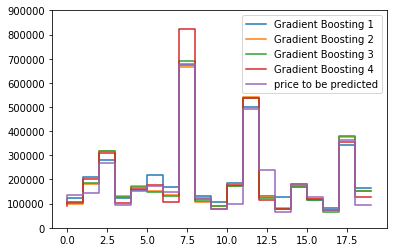

In [242]:
plt.step(range(20),pred1[:20], label='Gradient Boosting 1')
plt.step(range(20),pred2[:20] , label = 'Gradient Boosting 2')
plt.step(range(20),pred3[:20] , label = 'Gradient Boosting 3')
plt.step(range(20),pred4[:20] , label = 'Gradient Boosting 4')
plt.step(range(20),y_test[:20], label = 'price to be predicted')
plt.legend()
plt.ylim(0, 900000)

plt.show()